In [1]:
!pip install numpy

In [3]:
!pip install numpy==1.26.0

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
numba 0.57.1 requires numpy<1.25,>=1.21, but you have numpy 1.26.0 which is incompatible.



  Obtaining dependency information for numpy==1.26.0 from https://files.pythonhosted.org/packages/93/fd/3f826c6d15d3bdcf65b8031e4835c52b7d9c45add25efa2314b53850e1a2/numpy-1.26.0-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/61.1 kB ? eta -:--:--
     --------------------------------- ------ 51.2/61.1 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 61.1/61.1 kB 651.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/15.8 MB 7.0 MB/s eta 0:00:03
   - -------------------------------------- 0.5/15.8 MB 7.0 MB/s eta 0:00:03
   -- ------------------------------------- 1.2/15.8 MB 10.5 MB/s eta 0:00:02
   ----- ---------------------------------- 2.2/15.8 MB 13.8 MB/s eta 0:00:01
   ------- -------------------------------- 3.1/15.8 MB 14.2 MB/s eta 0:00:01
   --------- ------------------------------ 3.9/15.8 MB 15.4 MB/s eta 0:00:01
   --------- -----

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load data
df = pd.read_csv("Churn_Modelling.csv")  # Replace with the dataset path

# Drop irrelevant columns
df.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

# Handle missing values (if any)
df.fillna(method='ffill', inplace=True)

# Encode categorical variables
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male=1, Female=0
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)  # One-hot encoding

In [5]:
# Creating additional features (example: balance-to-salary ratio)
df['BalanceSalaryRatio'] = df['Balance'] / (df['EstimatedSalary'] + 1)  # Avoid division by zero
df['TenureByAge'] = df['Tenure'] / (df['Age'] + 1)

In [6]:
# Define features and target
X = df.drop("Exited", axis=1)  # Features
y = df["Exited"]  # Target

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

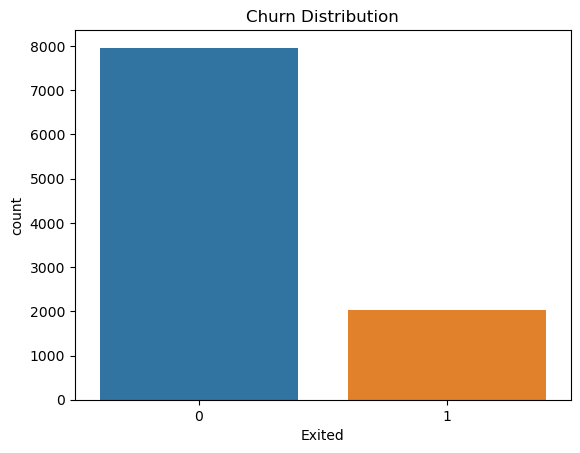

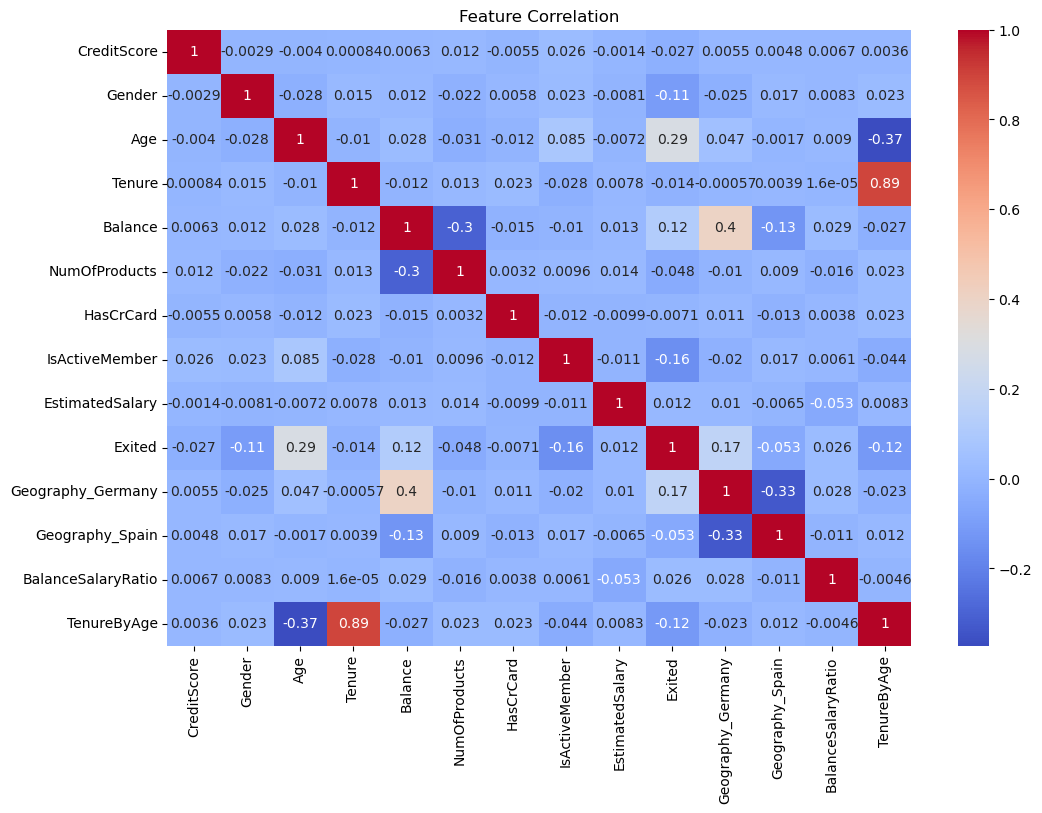

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of target variable
sns.countplot(data=df, x='Exited')
plt.title("Churn Distribution")
plt.show()

# Correlation heatmap
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

LOGISTIC REGRESSION

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_val)

# Evaluate
print("Logistic Regression Accuracy:", accuracy_score(y_val, y_pred_log))
print("ROC AUC:", roc_auc_score(y_val, log_model.predict_proba(X_val)[:, 1]))

Logistic Regression Accuracy: 0.7953333333333333
ROC AUC: 0.6880041230371932


C:\Users\srush\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DECISION TREE

In [9]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_val)

# Evaluate
print("Decision Tree Accuracy:", accuracy_score(y_val, y_pred_dt))

Decision Tree Accuracy: 0.796


XGBOOST

In [10]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_val)

# Evaluate
print("XGBoost Accuracy:", accuracy_score(y_val, y_pred_xgb))

XGBoost Accuracy: 0.8573333333333333


C:\Users\srush\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:47:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [11]:
!pip install lightgbm

LIGHTGBM

In [12]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)
y_pred_lgbm = lgbm_model.predict(X_val)

# Evaluate
print("LightGBM Accuracy:", accuracy_score(y_val, y_pred_lgbm))

[LightGBM] [Info] Number of positive: 1426, number of negative: 5574
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001140 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1358
[LightGBM] [Info] Number of data points in the train set: 7000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203714 -> initscore=-1.363240
[LightGBM] [Info] Start training from score -1.363240
LightGBM Accuracy: 0.8593333333333333


In [13]:
from sklearn.model_selection import GridSearchCV

# Example: Hyperparameter tuning for Random Forest
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [5, 10, 20],
    "min_samples_split": [2, 5, 10],
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring="accuracy", verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate tuned model
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_val)
print("Tuned Random Forest Accuracy:", accuracy_score(y_val, y_pred_rf))


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Tuned Random Forest Accuracy: 0.8626666666666667


In [14]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Split the training set further into training and validation for tuning
X_train_tune, X_val_tune, y_train_tune, y_val_tune = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Reduced parameter grid for faster tuning
xgb_param_grid = {
    'learning_rate': [0.05, 0.1],   # Small range for tuning
    'max_depth': [3, 5],
    'n_estimators': [100, 150],    # Focused on reasonable values
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize the best parameters
best_xgb_model = None
best_accuracy = 0

# Grid search manually using the validation set
for lr in xgb_param_grid['learning_rate']:
    for depth in xgb_param_grid['max_depth']:
        for n_est in xgb_param_grid['n_estimators']:
            for subsample in xgb_param_grid['subsample']:
                for colsample in xgb_param_grid['colsample_bytree']:
                    xgb_model = XGBClassifier(
                        learning_rate=lr,
                        max_depth=depth,
                        n_estimators=n_est,
                        subsample=subsample,
                        colsample_bytree=colsample,
                        random_state=42,
                        use_label_encoder=False,
                        eval_metric="logloss"
                    )
                    xgb_model.fit(X_train_tune, y_train_tune)
                    y_val_pred = xgb_model.predict(X_val_tune)
                    acc = accuracy_score(y_val_tune, y_val_pred)
                    if acc > best_accuracy:
                        best_accuracy = acc
                        best_xgb_model = xgb_model

# Evaluate on the main validation set
y_val_pred = best_xgb_model.predict(X_val)
print("Best XGBoost Accuracy:", accuracy_score(y_val, y_val_pred))

C:\Users\srush\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:48:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\srush\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:48:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\srush\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:48:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\srush\anaconda3\Lib\site-packages\

Best XGBoost Accuracy: 0.8633333333333333


In [15]:
from lightgbm import LGBMClassifier

# Reduced parameter grid for LightGBM
lgbm_param_grid = {
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'n_estimators': [100, 150],
    'num_leaves': [15, 31],         # Focus on smaller trees for faster training
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize the best parameters
best_lgbm_model = None
best_accuracy = 0

# Grid search manually using the validation set
for lr in lgbm_param_grid['learning_rate']:
    for depth in lgbm_param_grid['max_depth']:
        for n_est in lgbm_param_grid['n_estimators']:
            for leaves in lgbm_param_grid['num_leaves']:
                for subsample in lgbm_param_grid['subsample']:
                    for colsample in lgbm_param_grid['colsample_bytree']:
                        lgbm_model = LGBMClassifier(
                            learning_rate=lr,
                            max_depth=depth,
                            n_estimators=n_est,
                            num_leaves=leaves,
                            subsample=subsample,
                            colsample_bytree=colsample,
                            random_state=42
                        )
                        lgbm_model.fit(X_train_tune, y_train_tune)
                        y_val_pred = lgbm_model.predict(X_val_tune)
                        acc = accuracy_score(y_val_tune, y_val_pred)
                        if acc > best_accuracy:
                            best_accuracy = acc
                            best_lgbm_model = lgbm_model

# Evaluate on the main validation set
y_val_pred = best_lgbm_model.predict(X_val)
print("Best LightGBM Accuracy:", accuracy_score(y_val, y_val_pred))

[LightGBM] [Info] Number of positive: 1129, number of negative: 4471
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000416 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1357
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.201607 -> initscore=-1.376280
[LightGBM] [Info] Start training from score -1.376280
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

Confusion Matrix:
 [[1170   29]
 [ 177  124]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92      1199
           1       0.81      0.41      0.55       301

    accuracy                           0.86      1500
   macro avg       0.84      0.69      0.73      1500
weighted avg       0.86      0.86      0.84      1500



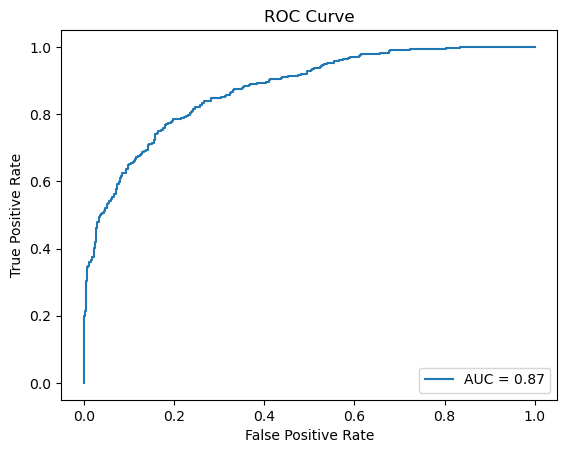

In [16]:
# Confusion Matrix and Classification Report
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_rf))
print("Classification Report:\n", classification_report(y_val, y_pred_rf))

# ROC Curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_val, best_rf.predict_proba(X_val)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [17]:
# Validate the best model on the test set
y_test_pred = best_rf.predict(X_test)
print("Test Set Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Set ROC AUC:", roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1]))

Test Set Accuracy: 0.872
Test Set ROC AUC: 0.8763702900515045


NEURAL NETWORKS (TENSORFLOW)

In [18]:
!pip install tensorflow

In [20]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv("Churn_Modelling.csv")

# Drop irrelevant columns
df.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

# Encode categorical variables
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

# Features and target
X = df.drop("Exited", axis=1)
y = df["Exited"]

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [21]:
# Build the neural network
model = Sequential([
    Dense(32, input_dim=X_train.shape[1], activation='relu'),  # Input layer + First hidden layer
    Dropout(0.2),                                              # Dropout for regularization
    Dense(16, activation='relu'),                              # Second hidden layer
    Dropout(0.2),                                              # Dropout
    Dense(1, activation='sigmoid')                             # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\srush\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6784 - loss: 0.6070 - val_accuracy: 0.8000 - val_loss: 0.4450
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7988 - loss: 0.4602 - val_accuracy: 0.8080 - val_loss: 0.4189
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8090 - loss: 0.4427 - val_accuracy: 0.8187 - val_loss: 0.4049
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8202 - loss: 0.4286 - val_accuracy: 0.8367 - val_loss: 0.3917
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8314 - loss: 0.4114 - val_accuracy: 0.8380 - val_loss: 0.3797
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8310 - loss: 0.4072 - val_accuracy: 0.8533 - val_loss: 0.3649
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8235 - loss: 0.4024 - val_accuracy: 0.8507 - val_loss: 0.3564
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8338 - loss: 0.3832 - val_accuracy: 0.

In [23]:
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Predictions on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("Test Set Accuracy (Manual Calculation):", accuracy_score(y_test, y_pred))

Test Accuracy: 0.87
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test Set Accuracy (Manual Calculation): 0.8733333333333333


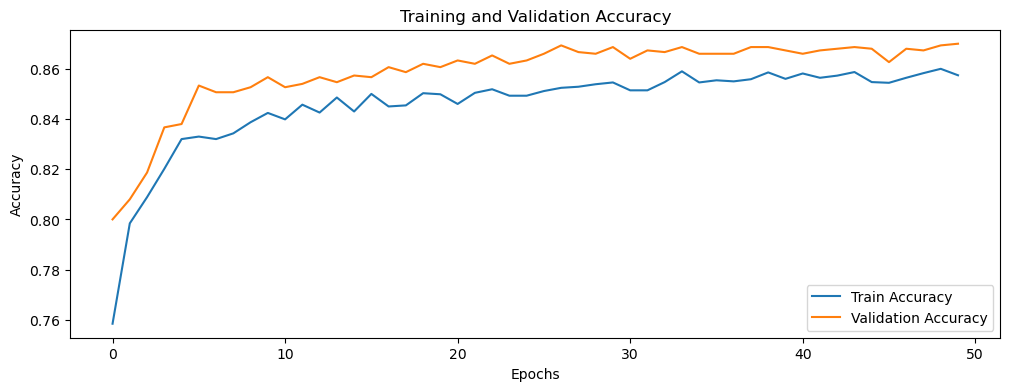

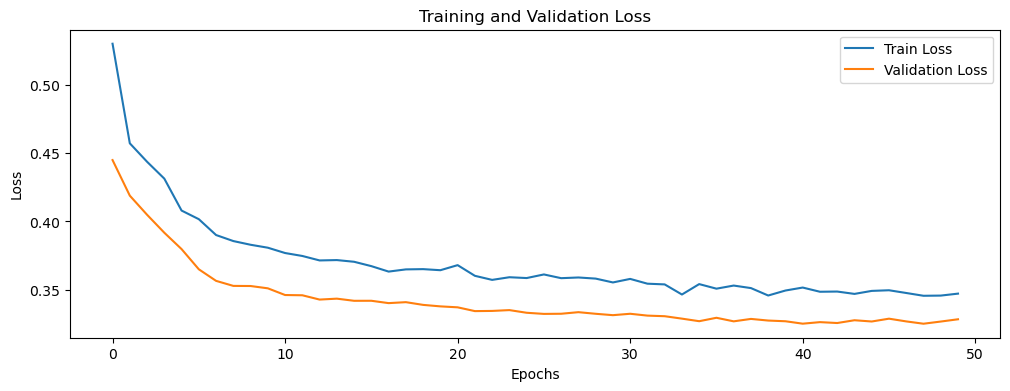

In [24]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(12, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [25]:
!pip install keras-tuner

  Obtaining dependency information for keras-tuner from https://files.pythonhosted.org/packages/db/5d/945296512980b0827e93418514c8be9236baa6f0a1e8ca8be3a2026665b0/keras_tuner-1.4.7-py3-none-any.whl.metadata
  Obtaining dependency information for kt-legacy from https://files.pythonhosted.org/packages/16/53/aca9f36da2516db008017db85a1f3cafaee0efc5fc7a25d94c909651792f/kt_legacy-1.0.5-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/129.1 kB ? eta -:--:--
   --- ------------------------------------ 10.2/129.1 kB ? eta -:--:--
   --- ------------------------------------ 10.2/129.1 kB ? eta -:--:--
   ------ -------------------------------- 20.5/129.1 kB 162.5 kB/s eta 0:00:01
   ------------ -------------------------- 41.0/129.1 kB 195.7 kB/s eta 0:00:01
   --------------- ----------------------- 51.2/129.1 kB 260.9 kB/s eta 0:00:01
   --------------- ----------------------- 51.2/129.1 kB 260.9 kB/s eta 0:00:01
   ------------------------------------ - 122.9/129.1 k

In [26]:
from keras_tuner import Hyperband

# Define the model-building function for Keras Tuner
def build_model(hp):
    model = Sequential()
    # Input and first hidden layer
    model.add(Dense(units=hp.Int('units_layer1', min_value=16, max_value=128, step=16),
                    activation='relu', input_dim=X_train.shape[1]))
    model.add(Dropout(rate=hp.Float('dropout_layer1', min_value=0.1, max_value=0.5, step=0.1)))
    
    # Second hidden layer
    model.add(Dense(units=hp.Int('units_layer2', min_value=16, max_value=128, step=16),
                    activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout_layer2', min_value=0.1, max_value=0.5, step=0.1)))
    
    # Output layer
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile the model
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-3, 5e-4, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Initialize the tuner
tuner = Hyperband(
    build_model,
    objective='val_accuracy',  # Optimize for validation accuracy
    max_epochs=50,             # Maximum number of epochs
    factor=3,                  # Reduction factor for hyperband
    directory='hyperparameter_tuning',  # Save tuning results in this directory
    project_name='customer_churn'
)

# Early stopping callback to prevent overfitting
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Run the tuner search
tuner.search(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:")
print(f"Units Layer 1: {best_hps.get('units_layer1')}")
print(f"Dropout Layer 1: {best_hps.get('dropout_layer1')}")
print(f"Units Layer 2: {best_hps.get('units_layer2')}")
print(f"Dropout Layer 2: {best_hps.get('dropout_layer2')}")
print(f"Learning Rate: {best_hps.get('learning_rate')}")

Trial 90 Complete [00h 00m 31s]
val_accuracy: 0.8653333187103271

Best val_accuracy So Far: 0.8679999709129333
Total elapsed time: 00h 15m 12s
Best Hyperparameters:
Units Layer 1: 80
Dropout Layer 1: 0.4
Units Layer 2: 96
Dropout Layer 2: 0.4
Learning Rate: 0.001


In [27]:
# Build the best model
best_model = tuner.hypermodel.build(best_hps)

# Train the best model
history = best_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate on the test set
test_loss, test_accuracy = best_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy with Tuned Hyperparameters: {test_accuracy:.4f}")

# Predictions
y_pred = (best_model.predict(X_test) > 0.5).astype("int32")
print("Test Set Accuracy (Manual Calculation):", accuracy_score(y_test, y_pred))

Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7597 - loss: 0.5283 - val_accuracy: 0.8173 - val_loss: 0.4139
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8125 - loss: 0.4400 - val_accuracy: 0.8327 - val_loss: 0.3941
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8196 - loss: 0.4185 - val_accuracy: 0.8473 - val_loss: 0.3754
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8268 - loss: 0.4182 - val_accuracy: 0.8573 - val_loss: 0.3603
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8422 - loss: 0.3851 - val_accuracy: 0.8573 - val_loss: 0.3509
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8430 - loss: 0.3848 - val_accuracy: 0.8553 - val_loss: 0.3454
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8436 - loss: 0.3801 - val_accuracy: 0.8593 - val_loss: 0.3400
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8509 - loss: 0.3582 - val_accuracy: 0.

In [30]:
from keras_tuner import Hyperband

# Define the model-building function
def build_model(hp):
    model = Sequential()
    
    # First hidden layer
    model.add(Dense(units=hp.Int('units_layer1', min_value=32, max_value=256, step=32),
                    activation='relu', input_dim=X_train.shape[1]))
    model.add(Dropout(rate=hp.Float('dropout_layer1', min_value=0.0, max_value=0.5, step=0.05)))
    
    # Second hidden layer
    model.add(Dense(units=hp.Int('units_layer2', min_value=32, max_value=256, step=32),
                    activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout_layer2', min_value=0.0, max_value=0.5, step=0.05)))
    
    # Optional third hidden layer
    if hp.Boolean('use_third_layer'):
        model.add(Dense(units=hp.Int('units_layer3', min_value=32, max_value=256, step=32),
                        activation='relu'))
        model.add(Dropout(rate=hp.Float('dropout_layer3', min_value=0.0, max_value=0.5, step=0.05)))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile the model
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-3, 5e-4, 1e-4, 1e-5])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Initialize the tuner
tuner = Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=100,  # Maximum number of epochs
    factor=3,
    directory='hyperparameter_tuning',
    project_name='improved_customer_churn'
)

# Early stopping callback to avoid overfitting
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Run the tuner search
tuner.search(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    callbacks=[early_stopping],
    verbose=1
)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:")
print(f"Units Layer 1: {best_hps.get('units_layer1')}")
print(f"Dropout Layer 1: {best_hps.get('dropout_layer1')}")
print(f"Units Layer 2: {best_hps.get('units_layer2')}")
print(f"Dropout Layer 2: {best_hps.get('dropout_layer2')}")
if best_hps.get('use_third_layer'):
    print(f"Units Layer 3: {best_hps.get('units_layer3')}")
    print(f"Dropout Layer 3: {best_hps.get('dropout_layer3')}")
print(f"Learning Rate: {best_hps.get('learning_rate')}")

Trial 254 Complete [00h 01m 03s]
val_accuracy: 0.8606666922569275

Best val_accuracy So Far: 0.8706666827201843
Total elapsed time: 01h 06m 31s
Best Hyperparameters:
Units Layer 1: 192
Dropout Layer 1: 0.30000000000000004
Units Layer 2: 64
Dropout Layer 2: 0.25
Units Layer 3: 256
Dropout Layer 3: 0.35000000000000003
Learning Rate: 0.001


In [32]:
# Define a fixed batch size
batch_size = 64  # You can experiment with 32, 64, or 128 for better performance

# Build the best model with optimized hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Train the best model
history = best_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=batch_size,  # Use fixed batch size
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate on the test set
test_loss, test_accuracy = best_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy with Tuned Hyperparameters: {test_accuracy:.4f}")

# Predictions
y_pred = (best_model.predict(X_test) > 0.5).astype("int32")
print("Test Set Accuracy (Manual Calculation):", accuracy_score(y_test, y_pred))

Epoch 1/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7756 - loss: 0.5184 - val_accuracy: 0.8300 - val_loss: 0.4197
Epoch 2/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8169 - loss: 0.4315 - val_accuracy: 0.8433 - val_loss: 0.3792
Epoch 3/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8321 - loss: 0.4021 - val_accuracy: 0.8560 - val_loss: 0.3685
Epoch 4/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8442 - loss: 0.3795 - val_accuracy: 0.8547 - val_loss: 0.3484
Epoch 5/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8412 - loss: 0.3787 - val_accuracy: 0.8573 - val_loss: 0.3389
Epoch 6/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8506 - loss: 0.3621 - val_accuracy: 0.8587 - val_loss: 0.3403
Epoch 7/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8528 - loss: 0.3569 - val_accuracy: 0.8627 - val_loss: 0.3402
Epoch 8/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8512 - loss: 0.3636 - val_accu

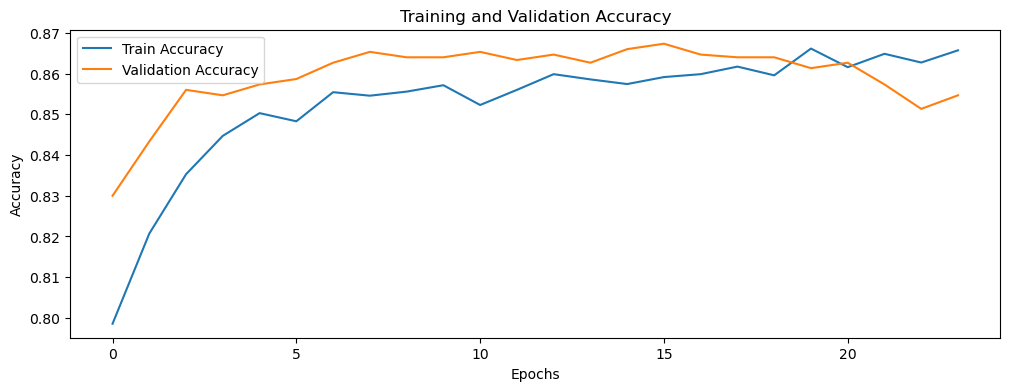

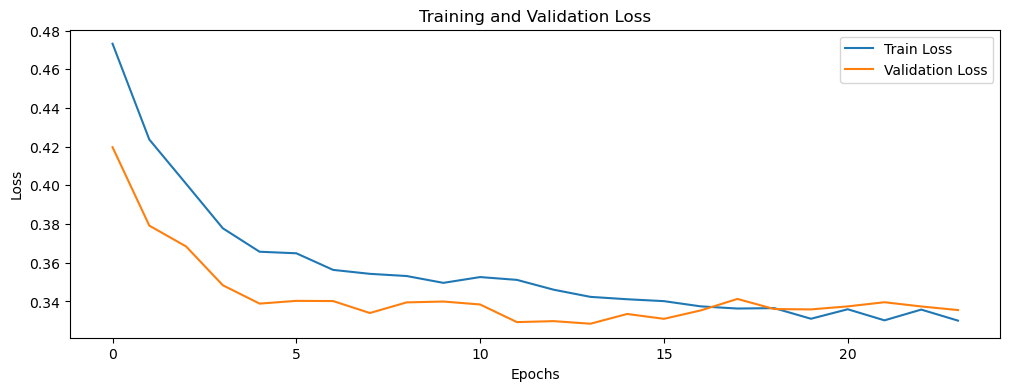

In [33]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(12, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()